In [1]:
# required packages installation

!pip install -r ../requirements.txt

You should consider upgrading via the 'd:\p\anaconda\python.exe -m pip install --upgrade pip' command.


In [2]:
# importing model and required components
from core.models import LogisticRegression
from core.optimizers import *
from core.regularizers import *

# imports for data loading
from requests import get
import idx2numpy
import gzip
import shutil
import os

# import for data processing and analysis
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# warnings ignoring
import warnings; warnings.simplefilter('ignore')

## Data loading

In [3]:
# data downloading and preprocessing function
        
def load_data():
    
    urls = []
    urls.append('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
    urls.append('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
    urls.append('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
    urls.append('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')
    
    print('Downloading data...')
    responses = [get(url, allow_redirects=True) for url in urls]
    
    names = ['train_images', 'train_labels', 'test_images', 'test_labels']
    
    for index, response in enumerate(responses):
        open(f'./datasets/prime_numbers/{names[index]}-gz', 'wb').write(response.content)
        
    print('Unpacking files...')
    for name in names:
        with gzip.open(f'./datasets/prime_numbers/{name}-gz', 'rb') as f_in:
            with open(f'./datasets/prime_numbers/{name}', 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
 
    for name in names:
        os.remove(f'./datasets/prime_numbers/{name}-gz')

    f_read = open('./datasets/prime_numbers/train-images','rb')
    X_train = idx2numpy.convert_from_file(f_read)

    f_read = open('./datasets/prime_numbers/train-labels', 'rb')
    y_train = idx2numpy.convert_from_file(f_read)

    f_read = open('./datasets/prime_numbers/test-images', 'rb')
    X_test = idx2numpy.convert_from_file(f_read)
    
    f_read = open('./datasets/prime_numbers/test-labels', 'rb')
    y_test = idx2numpy.convert_from_file(f_read)


    X_train = X_train.reshape(len(X_train), 784)
    X_test = X_test.reshape(len(X_test), 784)


    tmp_X = []
    tmp_y = []

    for index,label in enumerate(y_train):
        if label in [2,3,5,7]:
            tmp_X.append(X_train[index])
            tmp_y.append(1)
        elif label in [4,6,8,9]:
            tmp_X.append(X_train[index])
            tmp_y.append(0)

    tmp_X_test = []
    tmp_y_test = []

    for index,label in enumerate(y_test):
        if label in [2,3,5,7]:
            tmp_X_test.append(X_test[index])
            tmp_y_test.append(1)
        elif label in [4,6,8,9]:
            tmp_X_test.append(X_test[index])
            tmp_y_test.append(0)


    X_train = np.array(tmp_X)
    X_test = np.array(tmp_X_test)
    y_train = np.array(tmp_y)
    y_test = np.array(tmp_y_test)
    
    print('Data loading finished!')
    
    return X_train, X_test, y_train, y_test

In [4]:
# data loading

X_train_raw, X_test, y_train_raw, y_test = load_data()

Unpacking files...
Data loading finished!


## Data visualization

In [5]:
print("Num of our training samples: \t", X_train_raw.shape[0])
print("Num of our testing samples: \t", X_test.shape[0])

Num of our training samples: 	 47335
Num of our testing samples: 	 7885


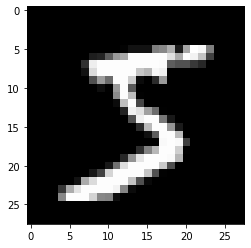

In [6]:
# single record visualization 

number = np.reshape(X_train_raw[0], (28,28))
plt.imshow(number, cmap='gray')
plt.show()

In [7]:
# training sample

print(X_train_raw[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

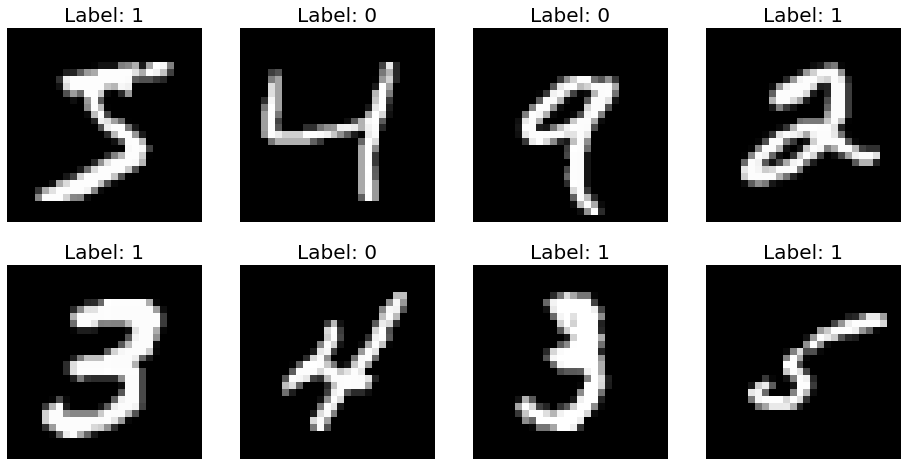

In [8]:
# some examples with labels

plt.figure(figsize=(16,8))

for i, (X, label) in enumerate(zip(X_train_raw[0:8], y_train_raw[0:8])):
    plt.subplot(2, 4, i + 1)
    plt.title(f'Label: {label}', fontsize = 20)
    plt.axis('off')
    plt.imshow(np.reshape(X, (28,28)), cmap='gray')
plt.show()

In [9]:
# taking num of samples we want to train aur model on 

num_of_samples = 10000

X_train = X_train_raw[:num_of_samples]
y_train = y_train_raw[:num_of_samples]

## Default model efficienty

In [10]:
# cross validation score determination on model with default parameters

model = LogisticRegression()
result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', error_score='raise')

In [11]:
print('Cross validation result')
print(result)
print('Cross validation mean')
print(np.mean(result))

Cross validation result
[0.9125 0.881  0.912  0.8985 0.82  ]
Cross validation mean
0.8847999999999999


## Optimizers testing

##### A Classification report is used to measure the quality of predictions from a classification algorithm. 
##### Main scores: 
##### **Precision** – What percent of your predictions were correct? (Precision = TP/(TP + FP))
##### **Recall** – What percent of the positive cases did you catch? (Recall = TP/(TP+FN))
##### **F1 score** – What percent of positive predictions were correct? (F1 Score = 2*(Recall * Precision) / (Recall + Precision))


In [12]:
# appending all optimizers to check their efficiency

optimizers = []

optimizers.append(GradientDescentOptimizer())
optimizers.append(MomentumGradientDescentOptimizer())
optimizers.append(AdaGradOptimizer())
optimizers.append(RMSPropOptimizer())

In [13]:
# regularizer=RidgeRegularizer(), num_iterations=300, threshold=0.5, fit_intercept=True, verbose=False

for optimizer in optimizers:
    model = LogisticRegression(optimizer = optimizer)
    model.fit(X_train_raw, y_train_raw)
    y_pred = model.predict(X_test)
    print("="*80)
    print(str(optimizer).center(80, ' '))
    print("="*80)
    print(classification_report(y_test, y_pred))

                 GradientDescentOptimizer(learning_rate: 0.03)                  
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3923
           1       0.91      0.91      0.91      3962

    accuracy                           0.91      7885
   macro avg       0.91      0.91      0.91      7885
weighted avg       0.91      0.91      0.91      7885

   MomentumGradientDescentOptimizer(learning_rate: 0.03, momentum_rate: 0.9)    
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      3923
           1       0.86      0.94      0.90      3962

    accuracy                           0.90      7885
   macro avg       0.90      0.90      0.90      7885
weighted avg       0.90      0.90      0.90      7885

             AdaGradOptimizer(learning_rate: 0.03, epsilon: 1e-07)              
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     

## Regularizers testing

In [14]:
# appending all regularizers to check their efficiency

regularizers = []

regularizers.append(LassoRegularizer())
regularizers.append(RidgeRegularizer())
regularizers.append(ElasticNetRegularizer())

In [15]:
# optimizer=RMSPropOptimizer, num_iterations=300, threshold=0.5, fit_intercept=True, verbose=False

for regularizer in regularizers:
    model = LogisticRegression(regularizer = regularizer)
    model.fit(X_train_raw, y_train_raw)
    y_pred = model.predict(X_test)
    print("="*80)
    print(str(optimizer).center(80, ' '))
    print("="*80)
    print(classification_report(y_test, y_pred))

        RMSPropOptimizer(learning_rate: 0.03, beta: 0.9, epsilon: 1e-07)        
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3923
           1       0.90      0.94      0.92      3962

    accuracy                           0.92      7885
   macro avg       0.92      0.91      0.91      7885
weighted avg       0.92      0.92      0.91      7885

        RMSPropOptimizer(learning_rate: 0.03, beta: 0.9, epsilon: 1e-07)        
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      3923
           1       0.97      0.78      0.87      3962

    accuracy                           0.88      7885
   macro avg       0.89      0.88      0.88      7885
weighted avg       0.89      0.88      0.88      7885

        RMSPropOptimizer(learning_rate: 0.03, beta: 0.9, epsilon: 1e-07)        
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     

### Number of samples testing

###### We should also test how numbers of samples affects on our scores

In [16]:
print('Number of all samples: ', len(X_train_raw))

Number of all samples:  47335


In [17]:
num_of_samples = [5, 100, 500, 1000, 2000, 5000, 10000, 20000]

In [18]:
for num in num_of_samples:
    model = LogisticRegression()
    model.fit(X_train_raw[:num], y_train_raw[:num])
    y_pred = model.predict(X_test)
    print(('" '+ str(num) +' samples "').center(53, '='))
    print(classification_report(y_test, y_pred))

====================" 5 samples "====================
              precision    recall  f1-score   support

           0       0.70      0.58      0.63      3923
           1       0.64      0.75      0.69      3962

    accuracy                           0.67      7885
   macro avg       0.67      0.67      0.66      7885
weighted avg       0.67      0.67      0.66      7885

===================" 100 samples "===================
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      3923
           1       0.87      0.72      0.79      3962

    accuracy                           0.81      7885
   macro avg       0.82      0.81      0.81      7885
weighted avg       0.82      0.81      0.81      7885

===================" 1000 samples "==================
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      3923
           1       0.83      0.93      0.88      3962

    accuracy        

### Number of iterations testing

In [19]:
num_of_iterations = [100, 300, 500, 1000, 3000]

In [20]:
for num in num_of_iterations:
    model = LogisticRegression(num_iterations=num)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(('" '+ str(num) +' iterations "').center(53, '='))
    print(classification_report(y_test, y_pred))

==================" 100 iterations "=================
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3923
           1       0.84      0.96      0.89      3962

    accuracy                           0.89      7885
   macro avg       0.89      0.89      0.89      7885
weighted avg       0.89      0.89      0.89      7885

==================" 300 iterations "=================
              precision    recall  f1-score   support

           0       0.97      0.24      0.39      3923
           1       0.57      0.99      0.72      3962

    accuracy                           0.62      7885
   macro avg       0.77      0.62      0.56      7885
weighted avg       0.77      0.62      0.56      7885

==================" 500 iterations "=================
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3923
           1       0.90      0.93      0.91      3962

    accuracy        

### Threshold testing

In [21]:
threshold = [0.3, 0.5, 0.65, 0.8]

In [22]:
for thresh in threshold:
    model = LogisticRegression(threshold=thresh)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(('" Threshold = '+ str(thresh) +' "').center(53, '='))
    print(classification_report(y_test, y_pred))

=================" Threshold = 0.3 "=================
              precision    recall  f1-score   support

           0       0.97      0.21      0.34      3923
           1       0.56      0.99      0.71      3962

    accuracy                           0.60      7885
   macro avg       0.76      0.60      0.53      7885
weighted avg       0.76      0.60      0.53      7885

=================" Threshold = 0.5 "=================
              precision    recall  f1-score   support

           0       0.69      0.99      0.81      3923
           1       0.99      0.55      0.71      3962

    accuracy                           0.77      7885
   macro avg       0.84      0.77      0.76      7885
weighted avg       0.84      0.77      0.76      7885

=================" Threshold = 0.65 "================
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      3923
           1       0.86      0.95      0.90      3962

    accuracy        